In [ ]:
import numpy as np
import sympy as sp
import math
from time import time
from scipy.linalg import cho_factor, cho_solve, lu
from matplotlib import pyplot as plt, patches

# **Sistemas Lineares com Matrizes Simétricas**

**1)** Considere a matriz $A$ e o vetor $b$ dados abaixo:

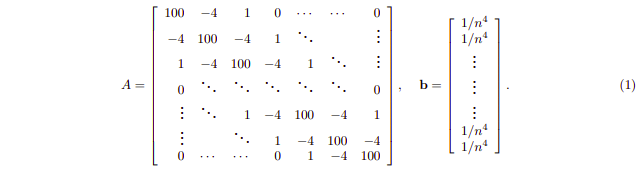

Seja n a dimensão do problema.

**a)** Escreva um código que monte a matriz $A$ para $n = 1000$.

In [ ]:
n = 1000  # Definição do tamanho da matriz

A = np.zeros((n, n))  # Criação da matrix A(n x n)

# Para a montagem da matriz, iremos percorrer apenas os índices diagonais 
for i in range(n):

  # Insere 100, quando for da diagonal principal
  A[i][i] = 100
  
  # Para cada inserção primeiro devemos checar se está coluna é pertencente aos
  # limites da matrix. Por conta disso, checar se ela é maior ou igual a 0 ou 
  # menor que o seu limite n. Assim, conforme pedido no exercício para colunas 
  # i-2 e i+2 inserimos 1, já para colunas i-1 e i+1 inserimos -4.
  if i + 1 < n:  
    A[i][i+1] = -4
  if i + 2 < n:  
    A[i][i+2] = 1
  if i - 1 >= 0: 
    A[i][i-1] = -4 
  if i - 2 >= 0: 
    A[i][i-2] = 1 

print(A)

[[100.  -4.   1. ...   0.   0.   0.]
 [ -4. 100.  -4. ...   0.   0.   0.]
 [  1.  -4. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.  -4.   1.]
 [  0.   0.   0. ...  -4. 100.  -4.]
 [  0.   0.   0. ...   1.  -4. 100.]]


In [ ]:
# Cria a matriz b, conforme passado ono exercício
b = np.ones((1000,1)) / math.pow(n, 4)

print(b[:5])

[[1.e-12]
 [1.e-12]
 [1.e-12]
 [1.e-12]
 [1.e-12]]


**b)** Escreva um código que faça a decomposição de Cholesky de uma matriz simétrica definida positiva qualquer.

<h2><b>Decomposição de Cholesky</b></h2>
 
---

A decomposição de Cholesky é uma técnica numérica utilizada para decompor uma matriz simétrica definida positiva em um produto matricial, onde a matriz resultante é triangular inferior. Essa decomposição é amplamente utilizada em várias áreas da matemática e da computação, incluindo otimização, resolução de sistemas lineares, estimação de parâmetros, entre outros. 

Além disso, esta decomposição é aplicada em matrizes simétricas positivas, ou seja, matrizes que possuem o determinante positivo. Sendo $A$ sua matrix original e $L$ uma matriz triangular inferior resultado.

Para a formulação da matriz L, utilizamos as seguintes fórmulas para o Termo Geral:


1.   Diagonal: 
$$h_{ii} = \left( a_{ii} - \sum_{k=1}^{i-1} h_{ik}^2 \right) $$

2.   Fora da diagonal:  
$$h_{ij} = \frac{a_{ij} - \sum_{k=1}^{j-1}h_{ik}h_{jk}}{h_{jj}}$$






In [ ]:
def cholesky(A):
  n, _ = np.shape(A)  # Dimensões da matriz
  L = np.zeros((n,n)) # Cria a matriz diagonal inferior

  # Executa o algortimo de Decomposição de Cholesky, seguintos as fórmulas 
  # apresentadas acima.
  for i in range(n):
    for j in range(i+1):

      # Executa o somatório para ambos os casos
      tempSum = sum(L[i][k] * L[j][k] for k in np.arange(j))           
            
      if (i == j): # Elementos da diagonal
          L[i][j] = math.sqrt(A[i][i] - tempSum)
      else:        # Elementos fora da diagonal
          L[i][j] = (1.0 / L[j][j] * (A[i][j] - tempSum))

  return L

inicio = time()
Lcho = cholesky(A)
fim = time()

print(Lcho)

[[10.          0.          0.         ...  0.          0.
   0.        ]
 [-0.4         9.9919968   0.         ...  0.          0.
   0.        ]
 [ 0.1        -0.39631718  9.99164314 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  9.99164043  0.
   0.        ]
 [ 0.          0.          0.         ... -0.39636438  9.99164043
   0.        ]
 [ 0.          0.          0.         ...  0.10008367 -0.39636438
   9.99164043]]


In [ ]:
# Com o objetivo de comprovar os resultados obtidos, comparei eles com 
# os resultados de funções nativas do numpy.
print(np.allclose(np.linalg.cholesky(A), Lcho))

True


**c)** Usando as rotinas implementadas anteriormente, escreva um código para resolver um sistema **$Ax = b$**.

<h2><b>Resolução de Sistema Triangulares (Superior)</b></h2>

---

Um sistema de linear de ordem $n$ é triangular inferior, se tiver a forma:

\\

$$\begin{bmatrix}a_{1,1}&u_{1,2}&a_{1,3}&\ldots &a_{1,n}\\&a_{2,2}&u_{2,3}&\ldots &a_{2,n}\\&&\ddots &\ddots &\vdots \\&&&\ddots &a_{n-1,n}\\&&&&a_{n,n}\end{bmatrix} \begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n 
\end{bmatrix} = \begin{bmatrix}
b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n 
\end{bmatrix}$$

\\

com $a_{ii} \neq 0$, para $i = 1, ..., n$.

\\

A solução pode ser obtida via substituição diretas, isto é:

\\

$$x_i = \frac{b_i - \sum_{j=1}^{i-1}a_{ij}x_j}{a_{nn}}, \quad i=1,...,n$$

In [ ]:
def triangularSUP(U, b):
  n, _ = U.shape  # Dimensões da matriz
  x = np.zeros(n) # Vetor de resultados

  # Percorre a matriz de forma inversa.
  for i in range(n - 1, -1, -1):
    tempSoma = 0  # Variável que será utilizada par ao armazenamneto do somatório

    for j in range(n - 1, i, -1):
      tempSoma += x[j] * (U[i][j] + math.pow(10, -15))  # Aplicação do somatório acima

    b[i] -= tempSoma  # Aplicação da subtração

    x[i] = b[i] / (U[i][i] + math.pow(10, -15)) # Computação do resultado
  
  return x

<h2><b>Resolução de Sistema Triangulares (Inferior)</b></h2>

---

Um sistema de linear de ordem $n$ é triangular inferior, se tiver a forma:

\\

$$\begin{bmatrix}\ a_{1,1}&&&&\\\ a _{2,1}&\ a_{2,2}&&&\\\ a_{3,1}&\ a_{3,2}&\ddots &&\\\vdots &\vdots &\ddots &\ddots &\\\ a _{n,1}&\ a_{n,2}&\ldots &\ a_{n,n-1}&\ a_{n,n}\end{bmatrix} \begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n 
\end{bmatrix} = \begin{bmatrix}
b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n 
\end{bmatrix}$$

\\

com $a_{ii} \neq 0$, para $i = 1, ..., n$.

\\

A solução pode ser obtida via substituição diretas, isto é:

\\

$$x_i = \frac{b_i - \sum_{j=1}^{i-1}a_{ij}x_j}{a_{ii}}, \quad i=1, ..., n$$

In [ ]:
def triangularINF(L, b):
  n, _ = L.shape  # Dimensões da matriz
  x = np.zeros(n) # Vetor de resultados 

  for i in range(n):
    tempSoma = 0 # Variável que será utilizada par ao armazenamneto do somatório

    for j in range(i):
      tempSoma += x[j] * L[i][j] # Aplicação do somatório acima

    b[i] -= tempSoma # Aplicação da subtração

    x[i] = b[i] / L[i][i] # Computação do resultado
  
  return x

<h2><b>Algoritmos de substituição</b></h2>

---

Tendo um sistema linear $Ax=b$, tal que $L$ e $U$ sejam suas matrizes triangulares inferior e superior, respectivamente, podemos encontar a solução do problema seguindo os seguintes passos:

1. $Ly=b$ com substituição progressivas.
2. $Ux=y$ com substituições regressivas.

Com este conhecimento em mente, podemos resolver o problema proposto. Pois, a decomposição de Cholesky é uma maneira de fatorar uma matriz simétrica e positiva $A$ em um produto de duas matrizes, ou seja, $A = L L^t$. Assim utilizando os passos acimas, temos:

1. $Ly=b$ com substituição progressivas.
2. $L^tx=y$ com substituições regressivas.

No código abaixo utilizaremos este método para a resolução.

In [ ]:
# Aplicando o método explicado acima, com as funções criadas nos passo anteriores.
yCho = triangularINF(Lcho, b)
xCho = triangularSUP(Lcho.T, yCho)

print(xCho[:10])

[1.03228419e-14 1.07323449e-14 1.06451885e-14 1.06376292e-14
 1.06382023e-14 1.06383008e-14 1.06382989e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14]


In [ ]:
# Com o objetivo de comprovar os resultados obtidos, comparei eles com 
# os resultados de funções nativas do scipy.
print(np.allclose(cho_solve(cho_factor(A), b), xCho))

True


**d)** Escreva um código implementando o método de Jacobi para resolver um sistema $Ax = b$. Utilize o erro
absoluto como critério de parada.

<h2><b>Método de Gauss-Jacobi</b></h2>

---

O método de jacobi é um método iterativo de matrizes utilizado para resolução de sistemas lineares $Ax = b$ para uma matriz quadrada $A$ de tamanho $n \times n$ conhecido.

Para a aplicação do método, vamos obter $x^{(k+1)} = Cx^{(k)}+g$ a partir do sistema linear $Ax = b$. Seja $D$ uma matriz diagonal formada pela diagonal de $A$. Assim, 

\\

$$Ax = b ⇔ \left( A - D + D\right)x = b ⇔ \left(A - D\right)x + Dx = b$$

\\

Desta forma, 

\\

$$\left(A-D\right)x^{(k)} + Dx^{(k+1)} = b ⇔ Dx^{(k+1)} = \left( D-A\right)x^{(k)} + b$$

\\

Portanto,

\\

$$x=^{(k+1)} = \underbrace{\left( I - D^{-1} A\right)}_{C}x^{(k)} + \underbrace{D^{-1}b}_{g}$$

\\

Além disso, vale ressaltar que o Método Gauss-Jacobi converge para a solução de $Ax = b$, independentemente da escolha de $x^{(0)}$, se satisfaz um dos critérios.


In [ ]:
#  Para a funnção de cáclculo por Gauss-Jacobi, foi usados erro de 10^(-20) e
#  número máximo de interações como 10^4 como valores padrões.
def jacobi(A, b, erro=math.pow(10, -20), maxInteracoes=math.pow(10, 4), chute=None):
  n, _ = A.shape   # Dimensões da matriz

  # Checa se o chute inicial foi dado, em caso negativo cria o chute inicial com 0s.
  if chute is None:
    chute = np.zeros(n)

  D = np.diag(np.diag(A)) # Diagonalização da matriz A e criação da D
  C = np.eye(n) - np.dot(np.linalg.inv(D), A) # Criação da matriz C, coforme a fórmula acima
  g = np.dot(np.linalg.inv(D), b) # Criação da matriz g, conforme a fórmula acima
 
  interacao = 0 # Variável para armazenar oo número de alterações feitas
  while np.linalg.norm(b - np.dot(A, chute)) > erro and interacao < maxInteracoes:
    chute = np.dot(C, chute) + g  # Cálculo do chute
    interacao += 1

  # Se o número de interações excedeu o máximo, retorna erro
  if interacao > maxInteracoes:
    raise Exception('Número máximo de interações excedido!')

  return chute, interacao

erro = np.linalg.norm(np.dot(A, xCho) - b) # Erro = ||A*x_cho - b|| 

xJacobi, interacoes = jacobi(A, b, erro=erro)

print(xJacobi)

[[1.03128750e-14 1.03128750e-14 1.03128750e-14 ... 1.03128750e-14
  1.03128750e-14 1.03128750e-14]
 [1.11094507e-14 1.11094507e-14 1.11094507e-14 ... 1.11094507e-14
  1.11094507e-14 1.11094507e-14]
 [1.09376421e-14 1.09376421e-14 1.09376421e-14 ... 1.09376421e-14
  1.09376421e-14 1.09376421e-14]
 ...
 [1.09239256e-14 1.09239256e-14 1.09239256e-14 ... 1.09239256e-14
  1.09239256e-14 1.09239256e-14]
 [1.10269815e-14 1.10269815e-14 1.10269815e-14 ... 1.10269815e-14
  1.10269815e-14 1.10269815e-14]
 [1.06147579e-14 1.06147579e-14 1.06147579e-14 ... 1.06147579e-14
  1.06147579e-14 1.06147579e-14]]


In [ ]:
# Com o objetivo de comprovar os resultados obtidos, comparei eles com 
# os resultados de funções nativas do numpy.
np.allclose(np.linalg.solve(A, b), xJacobi)

True

**e)** Vamos comparar o método direto de Cholesky com o iterativo de Jacobi neste exemplo. Observe quanto
tempo leva para resolver o sistema usando Cholesky. Quantas iterações foram necessárias no método de
Jacobi para obtermos a mesma precisão da solução dada pelo método de Cholesky ?

<h2><b>Análise de Complexidade</b></h2>

---

Com a iniciativa de avaliar e comparar o desempenho dos métodos utilizados nos tópicos anteriores é importante ter o conhecimento da complexidade de cada um deles, sendo:

1. Complexidade do Método de Cholesky: 

$$O\left(\frac{n^3}{3}\right)$$

2. Complexidade do Método de Gauss-Jacobi:

$$O\left(n^2\right)$$

\\

Assim, esperamos que o Método de Gauss-Jacobi forneça desempenhos mais satisfatórios em relação ao Método de Cholesky.

In [ ]:
print('O tempo de execução do Método de Cholesky para solução de um sistema linear foi de %s segundos' % (fim - inicio))
print('Foi necessário %s interações para o Método Gauss-Jacobi' % interacoes)

O tempo de execução do Método de Cholesky para solução de um sistema linear foi de 114.79077243804932 segundos
Foi necessário 2 interações para o Método Gauss-Jacobi


Como podemos perceber pelo resultados oferecidos no exercício podemos provar que o Método de Gauss-Jacobi possui vantagens de desempenho em comparação ao Método de Cholesky, pois obteve o mesmo resultado em um tempo consideravelmente menor.

**f)** É possível melhorar a implementação da decomposição de Cholesky para o exemplo em questão?

Sim, é possível melhorar a decomposição de Cholesky para o exemplo. Para isso ser possível podemos implementar as seguintes alterações:

1. **Verificar a simetria da matriz de entrada**: a matriz de entrada para o Método de Cholesky necessita ser simetrica, para isso poderiamos fazer uma funcionalidade para realizar esta checagem e em caso de falha retornar erro.

2. **Aproveitar a simetria da matriz**: como a matriz de Cholesky exige simetria, podemos utilizar esta caracterísca para para calcular apenas os valores relativos a uma parte da matriz triangular. Deste modo, economizariamos espaço e tempo de execução.

3. **Lidar com casos especiais**: existem certos casos em que a decomposição de Cholesky não é possível ou é instável, então para este cenários poderia utilizar outros métodos mais eficientes.



# **Método de Newton Para Sistemas Não-Lineares**

Em muitas aplicações, lidamos com sistemas não-lineares do tipo

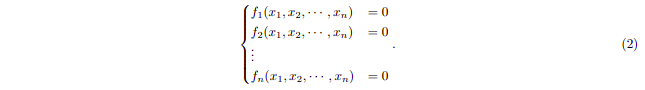

Escrevendo esse sistema na forma vetorial, temos

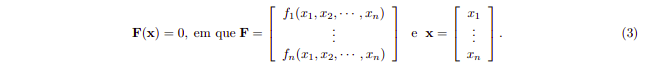

Podemos generalizar o método de Newton para uma função vetorial $F(x)$, em que cada iteração é da forma

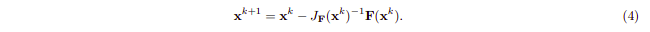

$J_F(x^k)$ designa a matriz Jacobiana de $F$ avaliada no ponto $x^k$. Lembramos que a matriz Jacobiana de uma
função $F$ é dada por

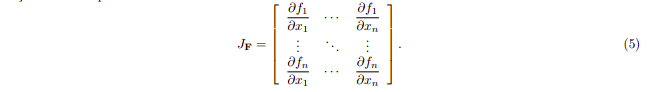

**1)** Observando a equação (4), vê-se a necessidade de calcular a matriz inversa da Jacobiana.
E possível calcular matrizes inversas usando a decomposição LU, sendo assim, implemente um 
código que:

**a)** Calcule a fatoração LU de uma matriz qualquer;

<h2><b>Decomposição LU</b></h2>

---

A decomposição $LU$ é uma técnica de fatoração de matrizes muito utilizada em álgebra linear, ela consiste em fatorar uma matriz original $A$ em outras duas matrizes $L$ e $U$, sendo elas, respectivamente, a matriz triangular inferior e e a matriz triangular superior.

Assim, para encontrar estas matrizes utilizamos as seguintes fórmulas de Termo Geral:


1. Cálculo de $u_{ij}$ com $j \geq i$:

$$u_{ij} = a_{ij} - \sum_{k=1}^{i-1}l_{ik}l_{ik}u_{kj}$$

2. Cálculo de $l_{ij}$ com $i > j$:

$$l_{ij} = \frac{a_{ij} - \sum_{k=1}^{j-1}l_{ik}u_{kj}}{u_{jj}}$$

In [ ]:
def decomposicaoLU(A):
  n, _ = np.shape(A)  # Dimensão da matriz
  L = np.eye(n)       # Inicia a matriz lower como identidade
  U = np.zeros((n,n)) # Inicia a matriz upper como zeros

  # Percorre as lindas da matriz para a execução das formulas acima
  for i in range(n):
    # Percorre os devidos campos realizando o somatória e a multiplicação
    for j in range(i, n):
      U[i][j] = A[i][j]  # Atribui o valor original da matriz A para a posição correta em U.

      # Realiza a subtração necessária para calcular o valor de U[i][j]. 
      # Ele itera sobre as colunas anteriores à coluna atual j e subtrai o produto de 
      #L[i][x] e U[x][j] de U[i][j].
      for x in range(i):
        U[i][j] -= L[i][x] * U[x][j] # Fórmula do somatório acima
    
    # Mesma ideia do código acima
    for k in range(i+1, n):
      L[k][i] = A[k][i]
      for x in range(i):
        L[k][i] -= L[k][x] * U[x][i]
      L[k][i] /= U[i][i]

  return L, U 

A = np.array([[2, 1, 2], [4, 3, 3], [6, 5, -1]])

L, U = decomposicaoLU(A)

print(L)
print(U)

[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]
[[ 2.  1.  2.]
 [ 0.  1. -1.]
 [ 0.  0. -5.]]


In [ ]:
# Com o checar se o resultado está correto, multiplique as dus matrizes para
# verificar se elas batem com a matriz original.
print(np.allclose(np.dot(L, U), A))

True


**b)** Resolva um sistema linear cujo lado direito é uma matriz;

<h2><b>Eliminação de Gauss</b></h2>

---

Dado um sistema linear $Ax=b$ de ordem $n$, onde $A$ possui todos os menores principais não-singlares, ou seja, $det(A_k) \neq 0, k = 1, ...n$.

Para realização do Método Direto Eliminação de Gauss temos um objetivo que se consiste em obter um sistema linear triangular superior equivalente a $Ax=b$ usando operações elementares que presenvam o determinate da matriz, ou seja, operações de escalonamento.

A elaboração seguirá a seguinte fórmula do Termo Geral, para $k = 1, ..., n-1$:

$$ U_{i}^{(k+1)} ← U_{i}^{(k)} + m_{ik} U_{k}^{(k)}, \quad i = k+1, ..., n 
\quad\quad\quad\quad \text{com} \quad m_{ik} = \frac{-a_{ik}^{(k)}}{a_{kk}^{(k)}}$$

In [ ]:
def solucaoGauss(A, b):
  n, _ = A.shape  # Dimensão da matriz 
  U = A.copy().astype('float64')  # Copia da matriz e matriz de resultado
  aux = b.copy().astype('float64')  # Auxiliar para não modificar a forma de b
  
  m = np.eye(n) # Matriz m, que será utilizada para armazenas os multiplicadores
                # utilizados durante o processo de eliminação.
  
  # Interaçõ sobre as linhas da matriz.
  for i in range(n - 1):
    # Interação sobre as linhas abaixo da linha atual i.
    for j in range(i + 1, n):
      # Calcula o multiplicador a ser aplicado na linha j para eliminar o elemento 
      # U[j][i] usando o elemento U[i][i] como pivô. A adição de math.pow(10, -15)
      # é um ajuste para evitar divisão por zero.
      m[j][i] = -(U[j][i] / (U[i][i] + math.pow(10, -15)))

      # Atualiza o termo independente na linha j ao multiplicar o multiplicador 
      # m[j][i] pelo termo independente aux[i] da linha i e somá-lo a aux[j].
      aux[j] += aux[i] * m[j][i]

      # Atualiza a matriz U multiplicando-a pela matriz de multiplicadores m. 
      # Isso realiza a eliminação dos elementos abaixo do pivô U[i][i] na coluna i.
      U = np.dot(m, U)

      # Redefine o multiplicador m[j][i] como zero para evitar erros de arredondamento.
      m[j][i] = 0
  
  return triangularSUP(U, aux)

A = np.array([[2, 1, 2], [4, 3, 3], [6, 5, -1]])
b = np.array([-1, 0, 6])

res = solucaoGauss(A, b)

print(res)

[ 6.66133815e-16  1.00000000e+00 -1.00000000e+00]


In [ ]:
# Verifica se o resultado é correto.
print(np.allclose(np.dot(A, res), b))

True


**c)** Finalmente, calcule a inversa de uma matriz qualquer resolvendo vários sistemas lineares.

<h2><b>Cálculo da Matriz Inversa</b></h2>

---

Para o cálculo da matriz inversa de $A$, ou seja, $A^{-1} = [v_1 | v_2 | ... | v_n]$, em que $v_i$ é a $i$-ésima coluna de $A^{-1}. Logo,

\\

$$ A \cdot [v_1 | v_2 | ... | v_n] = [e_1 | e_2 | ... | e_n]$$

\\

onde $e_i$ é $i$-ésima coluna da matriz identidade $I$.

Portanto, para obtermos a inversa temos que resolver os $n$ sistemas lineares:

\\

$$Av_i = e_i, \quad i=1, ..., n$$


In [ ]:
def matrizInversa(A):
  n, _ = A.shape # Dimensão da matriz

  I = np.eye(n)
  inversa = np.zeros((n, n)) # Matriz resultado da operação

  # Itera sobre as colunas da matriz identidade I (ou seja, as colunas 
  # correspondentes  da matriz inversa) e chama a função de Gauss para 
  # calcular a coluna correspondente da matriz inversa.
  for i in range(n):
    # Atribui a coluna calculada pela função solucaoGauss à coluna i da matriz inversa
    inversa[:][i] = solucaoGauss(A, I[:][i])
  
  return inversa.T

A = np.array([[2, 1], [5, 3]])

print(A)
print(matrizInversa(A))

[[2 1]
 [5 3]]
[[ 3. -1.]
 [-5.  2.]]


In [ ]:
# Verifica se o resultado é correto.
print(np.allclose(matrizInversa(A), np.linalg.inv(A)))

True


**2)** Implemente o método de Newton para sistemas usando a rotina implementada no item anterior.
Lembre-se de especificar o critério de parada utilizado.

<h2><b>Método de Newton (Algoritmo)</b></h2>

---

Para $k = 0, 1, ...$ até convergir faremos:

1. Resolver $J(x_k) v_k = f(x_k)$ para $v_k$;
2. Depois $x_{k+1} = x_k - v_k$.

Para cada iteração precisamos resolver o sistema linear.

In [ ]:
def sistemasNewton2(F, J, x, erro=math.pow(10, -5), interacoes=math.pow(10, 4)):
  # Norma é utilizada como critério de parada para verificar a convergência do método
  norm = np.linalg.norm(F(x)) 
  
  interacao = 0   # Armazena o número de interações

  # Equando as interações forem menores que o limete e a normalização maior que o erro.
  while interacao < interacoes and erro < abs(norm):
    # Calcula o incremento delta necessário para atualizar o vetor de 
    # entrada x no método de Newton pelo método da matriz inversa.
    delta = np.dot(matrizInversa(J(x)), F(x))

    x = x - delta # Atualiza o resultado 

    norm = np.linalg.norm(F(x)) # Atualiza a normalização 
    interacao += 1
  
  return x

**3)** Implemente novamente o método de Newton para sistemas usando o algoritmo abaixo. Utilize
as rotinas já implementadas neste trabalho para resolução do sistema linear, indicando sempre
qual está usando.

Calcular inversas de matrizes é um processo que demanda muito custo computacional (como pode ser
observado nos itens anteriores, precisa-se de uma fatoração LU e da resolução de vários sistemas lineares). Por
isso, ao usar o método de Newton para sistemas, faz-se algumas manipulações na equação (4) evitando o cálculo
da inversa da matriz Jacobiana. Define-se um vetor $z = x^k+1−x^k$
e resolve-se o sistema linear $J_F(x^k
)z = F(x^k)$.
Deste modo, o algoritmo para resolver um sistema de equações não-lineares usando o método de Newton é:

1. Numa dada iteração k, resolve-se o sistema $J_F(x^k)z = F(x^k)$,
2. Atualiza-se $x^{k+1} = x^k − z$.

In [ ]:
def sistemasNewton3(F, J, x, erro=math.pow(10, -5), interacoes=math.pow(10, 4)):
  # Norma é utilizada como critério de parada para verificar a convergência do método
  norm = np.linalg.norm(F(x))

  interacao = 0 # Armazena o número de interações

  # Equando as interações forem menores que o limete e a normalização maior que o erro.
  while interacao < interacoes and erro < abs(norm):
    # Calcula o incremento delta necessário para atualizar o vetor de 
    # entrada x no método de Newton pelo método de Gauss.
    delta = solucaoGauss(J(x), F(x))

    x = x - delta # Atualiza o resultado

    norm = np.linalg.norm(F(x)) # Atualiza a normalização
    interacao += 1
  
  return x

**OBS**: Depois do desenvolvimento dos códigos sobre os itens 2 e 3, iremos checar os resultados

In [ ]:
# Com o objetico de lidar com os sismtemas que serão utilizados nas questões 2, 3 e 4
# foi criado uma classe para a manipulação destes sistemas, nelas podemos passar as 
# equações que irão compor o nosso sistema. Assim, a partir delas criar sua matriz
# jacobiana, do mesmo modo que realizar as substituições necessárias.
class Sistema:
  # Inicia a classe com as incofinitas que seram utilizadas em nosso sistema.
  def __init__(self, incognitas):
    self.incognitas = incognitas
    self.J = []
    self.F = []
  
  # Adiciona uma nova equação ao sistema. A equação é fornecida no formato de string
  # e avalida pela função eval, que a tranforma numa equação. Assim,
  # é chamado o método criaJ para a atualização da jacobiana.
  def addEquacao(self, eq):
    self.F.append(eval(eq))
    self.criaJ()
  
  # Cria a matriz Jacobiana J do sistema. Ele itera sobre as variáveis incógnitas e 
  # calcula as derivadas parciais de cada equação em relação a essas variáveis. 
  # Os valores calculados são armazenados na matriz J.
  def criaJ(self):
    self.J = np.array([[sp.diff(f, var) for f in self.F] for var in self.incognitas]).T

  # Retorna o vetor de equações.
  def getF(self):
    return self.F
  
  # Retorna o vetor resultante da substituição das variáveis incógnitas x nas equações do sistema. 
  # Ele itera sobre as equações em F e substitui as variáveis pelos valores correspondentes em x.
  # Devido a problemas encontrado o foi necessário a mudança para float.
  def getFx(self, x):
    return np.array([f.subs({self.incognitas[tam]:x[tam] for tam in range(len(self.incognitas))}) for f in self.F], dtype=float)
  
  # Retorna a matriz jacobiana.
  def getJ(self):
    return self.J

  # Retorna a matriz Jacobiana J com as variáveis incógnitas substituídas pelos valores em x. 
  # Ele itera sobre as entradas da matriz J e substitui as variáveis pelos valores correspondentes em x.
  # Devido a problemas encontrado o foi necessário a mudança para float.
  def getJx(self, x):
    return np.array([[k.subs({self.incognitas[tam]:x[tam] for tam in range(len(self.incognitas))}) for k in i] for i in self.J], dtype=float)

In [ ]:
# Como é utilizada a classe:

# 1 - Cria as incoginas necessárias
x, y = sp.symbols('x y')

# 2 - Cria o sistema
sistemaNewton = Sistema([x, y])

# 3 - Adiciona as equações desejadads no formato de string.
sistemaNewton.addEquacao('x**2 - 2*x - y + 1')
sistemaNewton.addEquacao('x**2 - y**2 - 1')

chute = np.array([1, -1]) # Chute para o método de Newton

# Resoluções para o sistema encontrado.
res2 = sistemasNewton2(sistemaNewton.getFx, sistemaNewton.getJx, chute)
print('Resposta 2', np.around(res2, 5))

res3 = sistemasNewton3(sistemaNewton.getFx, sistemaNewton.getJx, chute)
print('Resposta 3', np.around(res3, 5))

Resposta 2 [ 1. -0.]
Resposta 3 [ 1. -0.]


**RESPOSTA**: As resposta se encaixam no espera, pois o sistema utilizado foi introduzido em aula e sua resposta esperada era $[0, 1]$.

**4)** Dada a equação de um círculo $(x − a)^2 + (y − b)^2 = R^2$ e três pontos que passam por esse cérculo

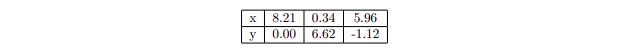

**a)** Monte um sistema não-linear para determinar $a$, $b$ e $R$.

In [ ]:
# Com a classe explicada acima é possível montar o sistema do problema.
a, b, R = sp.symbols('a b R') # Incoginitas utilizadas.
sistemaNaoLinear = Sistema([a, b, R]) # Criação do sistema.

# Adição das esquações.
sistemaNaoLinear.addEquacao('(%s - a)**2 + (%s - b)**2 - R**2' %(8.21, 0.00))
sistemaNaoLinear.addEquacao('(%s - a)**2 + (%s - b)**2 - R**2' %(0.34, 6.62))
sistemaNaoLinear.addEquacao('(%s - a)**2 + (%s - b)**2 - R**2' %(5.96, -1.12))

print(sistemaNaoLinear.getF())

[-R**2 + b**2 + 67.4041*(1 - 0.121802679658952*a)**2, -R**2 + (0.34 - a)**2 + 43.8244*(1 - 0.151057401812689*b)**2, -R**2 + 35.5216*(1 - 0.167785234899329*a)**2 + 1.2544*(-0.892857142857143*b - 1)**2]


**b)** Resolva o sistema não-linear utilizando os códigos feitos nos itens 2 e 3.

In [ ]:
chute = np.array([1, 1, 1]) # Chute para os métodos de Newton

# Utilização do método da matriz inversa.
inicioInversa = time()
resInversa = sistemasNewton2(sistemaNaoLinear.getFx, sistemaNaoLinear.getJx, chute)
fimInversa = time()

# Utilização do método da solução de Gauss.
inicioSolve = time()
resSolve = sistemasNewton3(sistemaNaoLinear.getFx, sistemaNaoLinear.getJx, chute) 
fimSolve = time()

print(resInversa)
print(resSolve)

[4.83010565 3.96992168 5.21382431]
[4.83010565 3.96992168 5.21382431]


**c)** Houve melhora no tempo de execução do código implementado no item 3?

In [ ]:
print('Duração Inversa', fimInversa - inicioInversa)
print('Duração Solve', fimSolve - inicioSolve)

Duração Inversa 0.036753177642822266
Duração Solve 0.02629685401916504


**RESPOSTA**: A implementação do item 3 possuiu um melhor desempenho em comparação ao método utilizado no item 2. Assim, podemos concluir que para sistemas grandes o método 3 terá um melhor desempenho e será computacionamente menos custosa.

**d)** Finalmente, com os resultados a, b e R, utilizando a equação do círculo dada por $(x−a)^2 + (y −b)^2 = R^2$,
imprima o gráfico que representa esse círculo.

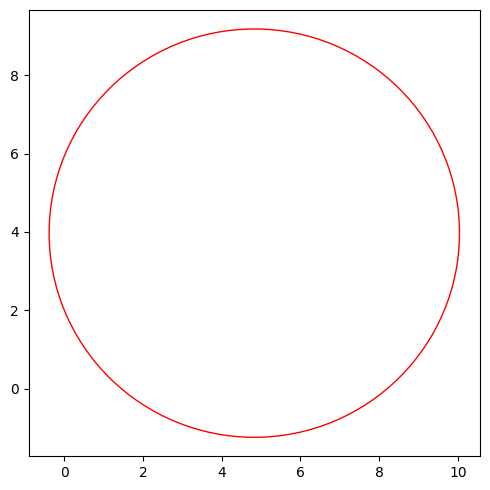

In [ ]:
# Criação do gráfico com o centro da cincunferência (a, b) e seu raio R.

plt.rcParams["figure.figsize"] = [5, 5]
fig = plt.figure()
ax = fig.add_subplot()
circle1 = patches.Circle((resSolve[0], resSolve[1]), radius=resSolve[2], color='red', fill=False)
ax.add_patch(circle1)
ax.axis('equal')
plt.show()